In [1]:
import pandas as pd
import numpy as np
from scipy.io import arff



Contract = pd.read_csv('C:/Users/bsuga/capstone_project/Data/Extract_from_Salesforce/Contract.csv',encoding='ISO-8859-1')
Contract_Quote = pd.read_csv('C:/Users/bsuga/capstone_project/Data/Extract_from_Salesforce/Contract_Quote.csv',encoding='ISO-8859-1')

In [2]:
#!pip install wheel
#!pip install pipwin

#!pipwin install numpy
#!pipwin install pandas
#!pipwin install shapely
#!pipwin install gdal
#!pipwin install fiona
#!pipwin install pyproj
#!pipwin install six
#!pipwin install rtree
#!pipwin install geopandas

In [3]:
import pandas as pd


import sqlite3

conn = sqlite3.connect(r"C:\Users\bsuga\sqlite\stormsmart21.db")

##push the dataframe to sql 
Contract.to_sql("Contract", conn, if_exists="replace")
Contract_Quote.to_sql("crm_Contract", conn, if_exists="replace")

C:\Users\bsuga\anaconda3\lib\site-packages\pandas\core\generic.py:2615: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [4]:
Contract_Quote = Contract_Quote.merge(Contract[['Contract Number', 'Sold Date - Date Only', 'Site Address','Latitude','Longitude']], how = 'left',
                left_on = 'Contract Number', right_on = 'Contract Number').drop(columns= ['Sold Date','Grand Total','Quote Name'])


In [5]:
Contract_Quote.info()
#Con_Quo.info()
Contract_Quote.shape
Contract_Quote.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21678 entries, 0 to 21677
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Contract Number        21678 non-null  int64  
 1   Contract ID            21678 non-null  object 
 2   Quote ID               21678 non-null  object 
 3   Smartview Contract ID  21665 non-null  float64
 4   Products               21648 non-null  object 
 5   Contract Approved      21678 non-null  int64  
 6   Status                 21678 non-null  object 
 7   Subtotal               21678 non-null  float64
 8   Total Price            21678 non-null  float64
 9   Contract Amount        21678 non-null  float64
 10  Sales Total            21678 non-null  float64
 11  Sold Date - Date Only  19559 non-null  object 
 12  Site Address           10379 non-null  object 
 13  Latitude               5078 non-null   float64
 14  Longitude              10296 non-null  float64
dtypes:

,Contract Number,Contract ID,Quote ID,Smartview Contract ID,Products,Contract Approved,Status,Subtotal,Total Price,Contract Amount,Sales Total,Sold Date - Date Only,Site Address,Latitude,Longitude
0,35725,8008H000000DELx,0Q04Q000005qr8I,NaN,Window and Shutter,1,Draft,18537.0,18537.0,18736.0,17112.0,9/30/2021,19719 BEECHCREST PL ESTERO FL 33928,NaN,26.460549
1,25146,8004Q000001RClb,0Q04Q000005jx3s,30207.0,Shutter,1,Approved,7767.0,7767.0,7208.7,6563.7,5/19/2020,195 VINTAGE CIR,26.21852,-81.733095
2,35723,8008H000000DELY,0Q04Q000005qr8I,NaN,Window and Shutter,1,Draft,18537.0,18537.0,18736.0,17112.0,9/30/2021,19719 BEECHCREST PL ESTERO FL 33928,NaN,26.460549
3,25147,8004Q000001RClc,0Q04Q000005jx3l,30205.0,Shutter,1,Approved,10350.0,10350.0,10500.0,9270.0,5/16/2020,"314 WINDING BROOK LN UNIT 102, BRADENTON FL 34...",NaN,27.510055
4,35726,8008H000000DEOI,0Q04Q000005qr8I,NaN,Window and Shutter,1,Draft,18537.0,18537.0,18736.0,17112.0,9/30/2021,19719 BEECHCREST PL ESTERO FL 33928,NaN,26.460549


In [6]:
Contract_Quote= Contract_Quote[Contract_Quote['Status'] == 'Approved']

Contract_Quote=Contract_Quote[Contract_Quote['Total Price'] != 0]


Contract_Quote.dropna(subset = ['Products'], inplace=True)
Contract_Quote.dropna(subset = ['Latitude'], inplace=True)                             

Contract_Quote.dropna(subset = ['Site Address'], inplace=True)
Contract_Quote.head()

,Contract Number,Contract ID,Quote ID,Smartview Contract ID,Products,Contract Approved,Status,Subtotal,Total Price,Contract Amount,Sales Total,Sold Date - Date Only,Site Address,Latitude,Longitude
1,25146,8004Q000001RClb,0Q04Q000005jx3s,30207.0,Shutter,1,Approved,7767.0,7767.0,7208.7,6563.7,5/19/2020,195 VINTAGE CIR,26.218520,-81.733095
9,25230,8004Q000001RCpb,0Q04Q000005jwrN,30301.0,Window,1,Approved,13702.0,13702.0,29199.0,16846.0,5/19/2020,1655 WINDING OAKS WAY #202,26.262933,-81.773646
12,295,8001U0000003t43,0Q01U000000vVLf,28131.0,Shutter,1,Approved,12125.0,12125.0,9237.0,7821.0,2/7/2020,3713 PLEASANT SPRINGS DR,26.297815,-81.719438
16,297,8001U0000003t45,0Q01U000000vVOl,28229.0,Shutter,1,Approved,7025.0,7025.0,7245.0,5971.0,2/14/2020,10706 PRATO DR FORT MYERS FL 33913,26.593964,-81.764015
24,301,8001U0000003t49,0Q01U000000vVSs,28370.0,Shutter,1,Approved,6438.0,6438.0,6658.0,5836.0,2/21/2020,13501 PALMETTO GROVE DR FORT MYERS FL 33905,26.693666,-81.734365


In [7]:
Contract_Quote.shape

(4853, 15)

In [8]:
Contract_Quote['Discount_Contract']= (1-Contract_Quote['Contract Amount']/Contract_Quote['Total Price'])*100

Contract_Quote['Discount_Sales']= (1-Contract_Quote['Sales Total']/Contract_Quote['Total Price'])*100


Contract_Quote_round= Contract_Quote.round(decimals = 2)

Contract_Quote_round.head()

,Contract Number,Contract ID,Quote ID,Smartview Contract ID,Products,Contract Approved,Status,Subtotal,Total Price,Contract Amount,Sales Total,Sold Date - Date Only,Site Address,Latitude,Longitude,Discount_Contract,Discount_Sales
1,25146,8004Q000001RClb,0Q04Q000005jx3s,30207.0,Shutter,1,Approved,7767.0,7767.0,7208.7,6563.7,5/19/2020,195 VINTAGE CIR,26.22,-81.73,7.19,15.49
9,25230,8004Q000001RCpb,0Q04Q000005jwrN,30301.0,Window,1,Approved,13702.0,13702.0,29199.0,16846.0,5/19/2020,1655 WINDING OAKS WAY #202,26.26,-81.77,-113.10,-22.95
12,295,8001U0000003t43,0Q01U000000vVLf,28131.0,Shutter,1,Approved,12125.0,12125.0,9237.0,7821.0,2/7/2020,3713 PLEASANT SPRINGS DR,26.30,-81.72,23.82,35.50
16,297,8001U0000003t45,0Q01U000000vVOl,28229.0,Shutter,1,Approved,7025.0,7025.0,7245.0,5971.0,2/14/2020,10706 PRATO DR FORT MYERS FL 33913,26.59,-81.76,-3.13,15.00
24,301,8001U0000003t49,0Q01U000000vVSs,28370.0,Shutter,1,Approved,6438.0,6438.0,6658.0,5836.0,2/21/2020,13501 PALMETTO GROVE DR FORT MYERS FL 33905,26.69,-81.73,-3.42,9.35


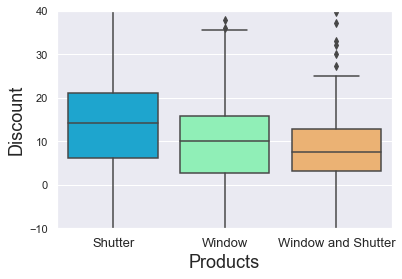

In [12]:
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
Contract_Quote_round['Discount']=Contract_Quote_round['Discount_Sales']
plt.ylim(-10, 40)
sns.set(color_codes=True)


sns.boxplot( x=Contract_Quote_round['Products'],y=Contract_Quote_round['Discount'],palette='rainbow');
plt.xticks(Fontsize=13)
plt.xlabel('Products', fontsize=18)
plt.ylabel('Discount', fontsize=18)
plt.show()

In [11]:
Contract_Quote=Contract_Quote[Contract_Quote['Discount_Sales'] >=-30]
Contract_Quote=Contract_Quote[Contract_Quote['Discount_Sales'] <=40]

Contract_Quote['Discount_Sales'] = Contract_Quote['Discount_Sales'].apply(lambda x: x if x >= 0 else 0)
Contract_Quote.head()

,Contract Number,Contract ID,Quote ID,Smartview Contract ID,Products,Contract Approved,Status,Subtotal,Total Price,Contract Amount,Sales Total,Sold Date - Date Only,Site Address,Latitude,Longitude,Discount_Contract,Discount_Sales
1,25146,8004Q000001RClb,0Q04Q000005jx3s,30207.0,Shutter,1,Approved,7767.0,7767.0,7208.7,6563.7,5/19/2020,195 VINTAGE CIR,26.218520,-81.733095,7.188104,15.492468
9,25230,8004Q000001RCpb,0Q04Q000005jwrN,30301.0,Window,1,Approved,13702.0,13702.0,29199.0,16846.0,5/19/2020,1655 WINDING OAKS WAY #202,26.262933,-81.773646,-113.100277,0.000000
12,295,8001U0000003t43,0Q01U000000vVLf,28131.0,Shutter,1,Approved,12125.0,12125.0,9237.0,7821.0,2/7/2020,3713 PLEASANT SPRINGS DR,26.297815,-81.719438,23.818557,35.496907
16,297,8001U0000003t45,0Q01U000000vVOl,28229.0,Shutter,1,Approved,7025.0,7025.0,7245.0,5971.0,2/14/2020,10706 PRATO DR FORT MYERS FL 33913,26.593964,-81.764015,-3.131673,15.003559
24,301,8001U0000003t49,0Q01U000000vVSs,28370.0,Shutter,1,Approved,6438.0,6438.0,6658.0,5836.0,2/21/2020,13501 PALMETTO GROVE DR FORT MYERS FL 33905,26.693666,-81.734365,-3.417210,9.350730


C:\Users\bsuga\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


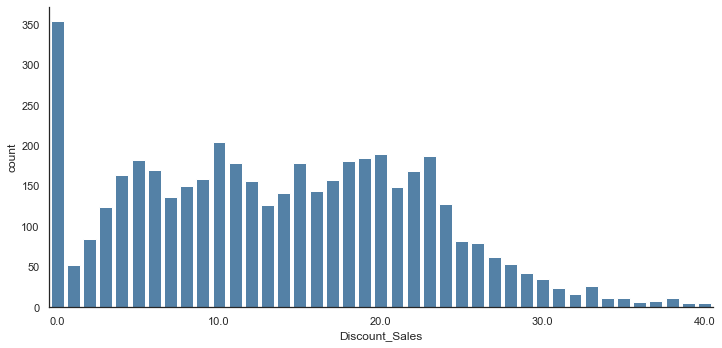

In [12]:
with sns.axes_style('white'):
    df= Contract_Quote.round(decimals = 0)
    g = sns.factorplot('Discount_Sales', data=df, aspect=2,
                       kind='count', color='steelblue')
    
    g.set_xticklabels(step=10)
  

In [13]:
df= Contract_Quote

import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame



geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('
                                             '))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

SyntaxError: EOL while scanning string literal (<ipython-input-13-9126aa01b1bf>, line 14)

In [14]:
df= Contract_Quote
df.to_csv('C:/Users/bsuga/capstone_project/Data/Extract_from_Salesforce/Processed_Data_V2.csv',encoding='ISO-8859-1')
df.head()

PermissionError: [Errno 13] Permission denied: 'C:/Users/bsuga/capstone_project/Data/Extract_from_Salesforce/Processed_Data_V2.csv'

In [15]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


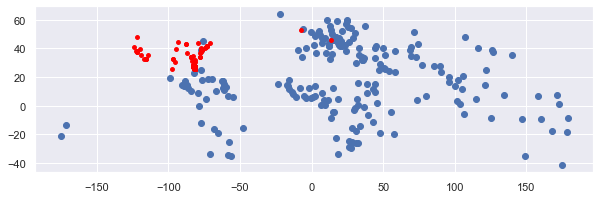

In [16]:
df= Contract_Quote

import pandas as pd
import shapely
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame



geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);


In [17]:
 Contract_Quote.shape

(4531, 18)

In [18]:

df= Contract_Quote
df_1 = df.iloc[:500,:]
df_2 = df.iloc[501:1000,:]
df_3 = df.iloc[1001:1500,:]
df_4 = df.iloc[1501:2000,:]
df_5 = df.iloc[2001:2500,:]
df_6 = df.iloc[2501:3000,:]
df_7 = df.iloc[3001:3500,:]
df_8 = df.iloc[3501:4000,:]
df_9 = df.iloc[4001:,:]



In [19]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")
def city_state_country(L,R):
    #print(L)
    #print(R)
    coord=str(L)+','+str(R)
    location = geolocator.reverse(coord, exactly_one=True)
    address = location.raw['address']
    city = address.get('city', '')
    state = address.get('state', '')
    country = address.get('country', '')
    return address

In [20]:
df_1['Location'] = df_1.apply(lambda x: city_state_country(x.Latitude, x.Longitude), axis=1)
df_1.shape

GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=26.262932799999998&lon=-81.7736458&format=json&addressdetails=1 (Caused by ConnectTimeoutError(<urllib3.connection.VerifiedHTTPSConnection object at 0x000001D7D2406B08>, 'Connection to nominatim.openstreetmap.org timed out. (connect timeout=1)'))

In [ ]:
df_2['Location'] = df_2.apply(lambda x: city_state_country(x.Latitude, x.Longitude), axis=1)
df_2.shape

In [ ]:
df_3['Location'] = df_3.apply(lambda x: city_state_country(x.Latitude, x.Longitude), axis=1)
df_3.shape

In [ ]:
df_4['Location'] = df_4.apply(lambda x: city_state_country(x.Latitude, x.Longitude), axis=1)
df_4.shape

In [ ]:
df_5['Location'] = df_5.apply(lambda x: city_state_country(x.Latitude, x.Longitude), axis=1)
df_5.shape

In [ ]:
df_6['Location'] = df_6.apply(lambda x: city_state_country(x.Latitude, x.Longitude), axis=1)
df_6.shape

In [ ]:
df_7['Location'] = df_7.apply(lambda x: city_state_country(x.Latitude, x.Longitude), axis=1)
df_7.shape

In [ ]:
df_8['Location'] = df_8.apply(lambda x: city_state_country(x.Latitude, x.Longitude), axis=1)
df_8.shape

In [ ]:
df_9['Location'] = df_9.apply(lambda x: city_state_country(x.Latitude, x.Longitude), axis=1)
df_9.shape

In [ ]:
df = [df_1, df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9]
  
df = pd.concat(df)
df.shape
df['Location'].head()

In [ ]:
df = pd.concat([df, df["Location"].apply(pd.Series)], axis=1)
df.head()

In [ ]:
df.to_csv('C:/Users/bsuga/capstone_project/Data/Extract_from_Salesforce/Processed_Data_V1.csv',encoding='ISO-8859-1')

In [ ]:
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
 
#Applying the method to pandas DataFrame
df['location'] = df['Site Address'].apply(geocode)
df['Lat'] = df['location'].apply(lambda x: x.latitude if x else None)
df['Lon'] = df['location'].apply(lambda x: x.longitude if x else None)